# Data Exploration for Health care data

Understand data structre and find main characteristics
1. Data Analysis
2. Statistical Analysis
3. Datat Quality and Reliability
4. Selection of preprocessing steps

## Information from authour

Heart diseases, especially heart attacks and strokes,  are a leading cause of death globally.

This was a csv file gotten from Kaggle <https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data> containing 11 features to predict heart disease and their labels.
1. Age (years)
2. Sex (M: Male or F: Female)
3. ChestPainType: chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
4. RestingBP: (mm Hg)
5. Cholestorol (mm/dl)
6. FastingBS: fasting blood sugar (1: >120 mg/dl, 0: <= 120 mg/dl)
7. RestingECG (Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. MaxHR (# between 60 and 202)
9. ExerciseAngina: ecercise induced Angina ( Y yes, N no)
10. Oldpeak: ST numeric measured in depression
11. ST_Slope: slope of peak exercise ST segment (Up upsloping, Flat, Down)
12 Heartdisease: output labels (1: heart disease, 0: Normal)

### Source
Dataset combines 5 heart datasets over 11 common features


Popular risk factors for heart/Cardivascular disease are hypertention, diabetes, hyperlipidaemia.



In [61]:
# Importing necessary tools
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import os
from PIL import Image
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder

General data information
* Number of samples
* paterns
* How it looks
Missing values?
Show distribution

In [9]:
# Load Data
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Check size of data for number of samples
data.shape

(918, 12)

In [12]:
# Check if any Null values
data.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
np.where(pd.isnull(data))

(array([], dtype=int64), array([], dtype=int64))

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Inital Data
1. 918 values
2. No missing values

## Statistical Analysis
* numpy describe
* Outlier detection (Z * Score3 std of mean values)

## Data Characteristics
* Central tendecy
* Distribution
* Min Max
* Percentiles

In [16]:
# get general Statistics
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Outlier detection
# some outliers were detected

In [50]:
# Finding Outliers with z score
z_scores = np.abs(stats.zscore(data[['Age', 'RestingBP', 'MaxHR', 'Cholesterol', 'Oldpeak']]))
outliers_z = data[(z_scores > 3).any(axis=1)]
print(outliers_z)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
76    32   M           ASY        118          529          0     Normal   
109   39   M           ATA        190          241          0     Normal   
149   54   M           ASY        130          603          1     Normal   
166   50   M           ASY        140          231          0         ST   
241   54   M           ASY        200          198          0     Normal   
324   46   M           ASY        100            0          1         ST   
365   64   F           ASY        200            0          0     Normal   
390   51   M           ASY        140            0          0     Normal   
399   61   M           NAP        200            0          1         ST   
449   55   M           NAP          0            0          0     Normal   
592   61   M           ASY        190          287          1        LVH   
616   67   F           NAP        115          564          0        LVH   
702   59   M

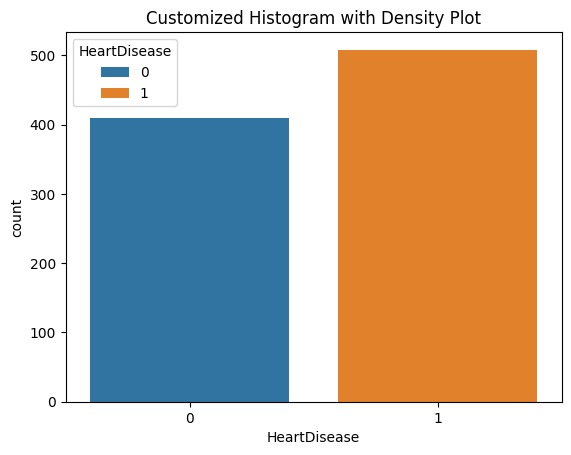

In [44]:
# Class distribution
# visualize class distribution
sns.countplot(data=data, x='HeartDisease', hue='HeartDisease')
 
# Adding labels and title
plt.title('Customized Histogram with Density Plot')
 
# Display the plot
plt.show()

##-----------------------------------------------------------------------------------------------------------##

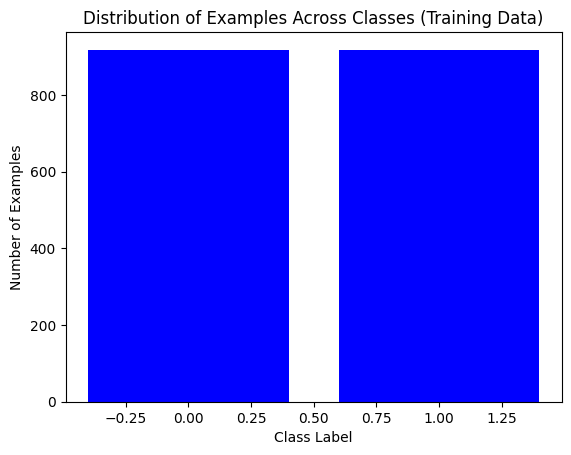

In [29]:
# visualize class distribution
class_labels = data['HeartDisease']

plt.bar(class_labels, 918, color='blue')
plt.xlabel('Class Label')
plt.ylabel('Number of Examples')
plt.title('Distribution of Examples Across Classes (Training Data)')
plt.savefig("ClassDistribution.png") 
plt.show()


## patterns
See relationship between features and classes.

## Balance
Imbalanced?
Proportional in categories?


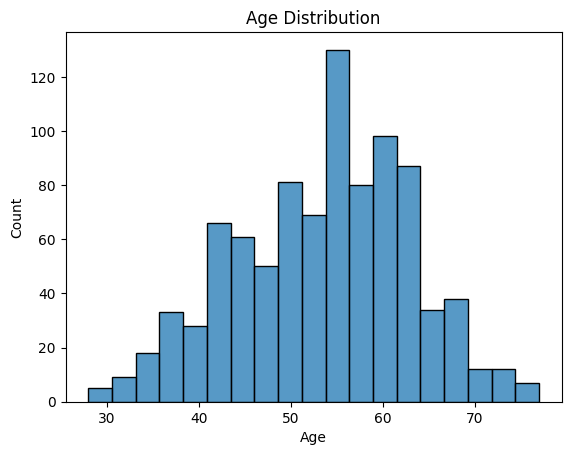

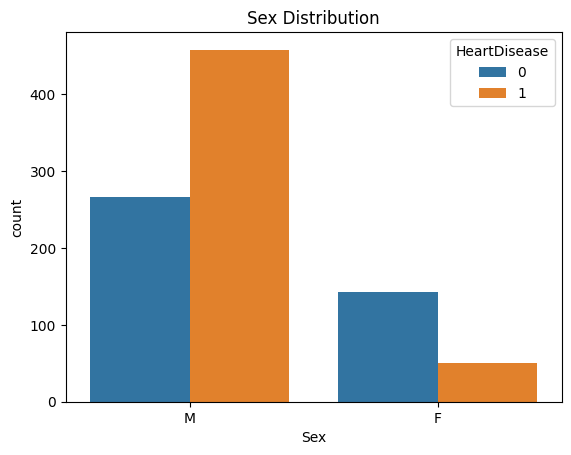

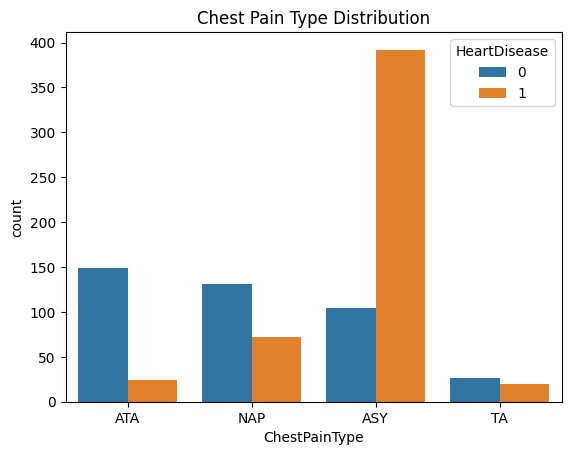

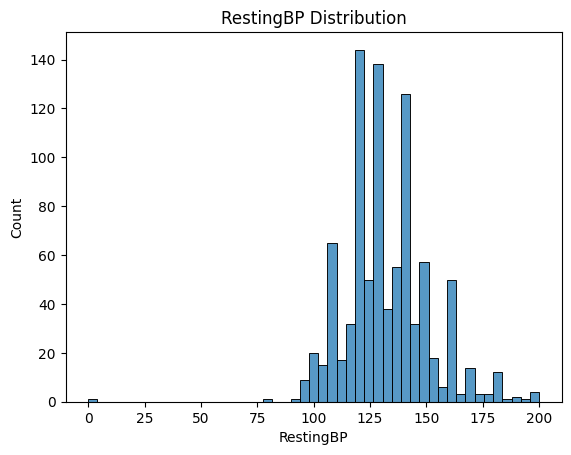

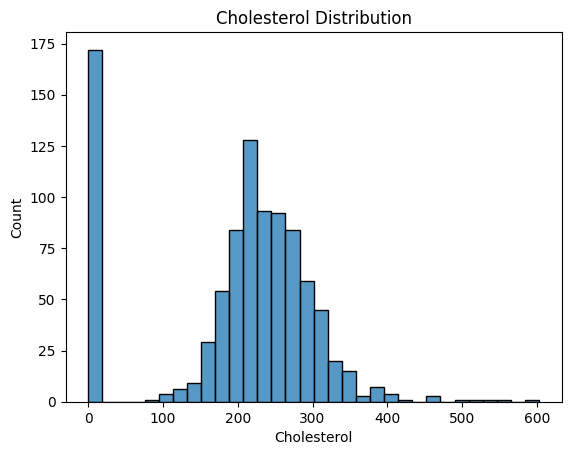

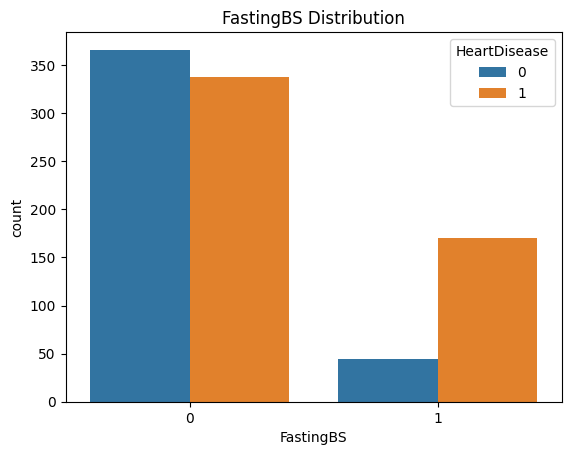

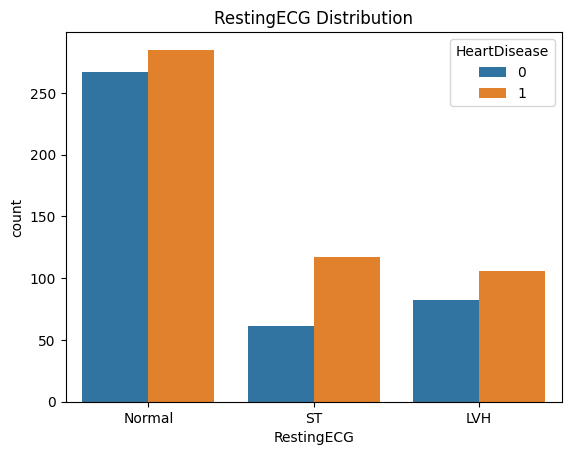

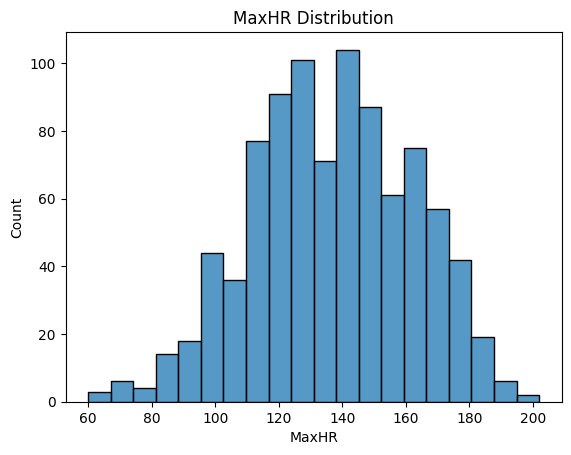

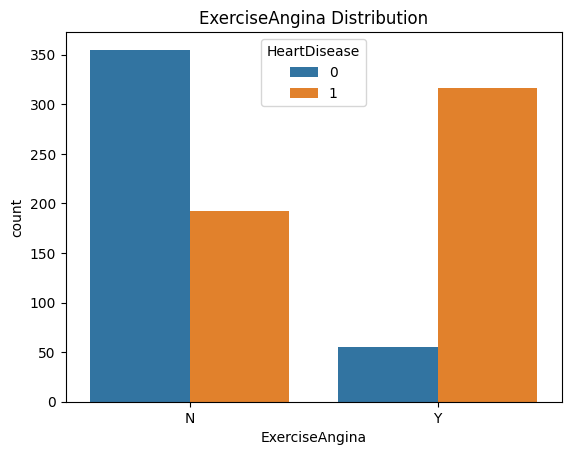

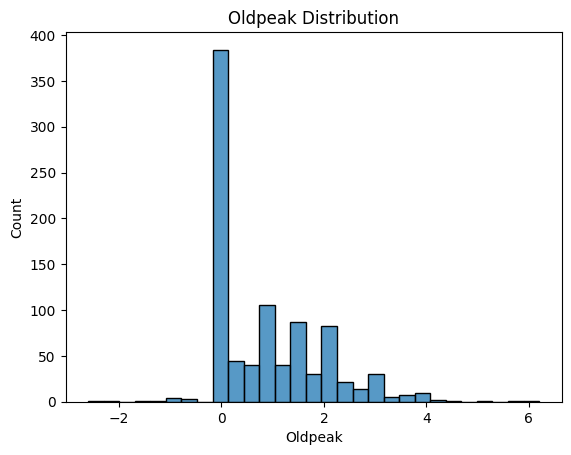

In [58]:
# 1. Age (years)
sns.histplot(data['Age'])
plt.title('Age Distribution')
# Display the plot
plt.show()

# 2. Sex (M: Male or F: Female)
sns.countplot(data=data, x='Sex', hue='HeartDisease')
plt.title('Sex Distribution')
plt.show()

# 3. ChestPainType: chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
sns.countplot(data=data, x='ChestPainType', hue='HeartDisease')
plt.title('Chest Pain Type Distribution')
plt.show()

# 4. RestingBP: (mm Hg)
sns.histplot(data['RestingBP'])
plt.title('RestingBP Distribution')
# Display the plot
plt.show()

# 5. Cholesterol (mm/dl)
sns.histplot(data['Cholesterol'])
plt.title('Cholesterol Distribution')
# Display the plot
plt.show()

# 6. FastingBS: fasting blood sugar (1: >120 mg/dl, 0: <= 120 mg/dl)
sns.countplot(data=data, x='FastingBS', hue='HeartDisease')
plt.title('FastingBS Distribution')
plt.show()

# 7. RestingECG (Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
sns.countplot(data=data, x='RestingECG', hue='HeartDisease')
plt.title('RestingECG Distribution')
plt.show()

# 8. MaxHR (# between 60 and 202)
sns.histplot(data['MaxHR'])
plt.title('MaxHR Distribution')
# Display the plot
plt.show()

# 9. ExerciseAngina: ecercise induced Angina ( Y yes, N no)
sns.countplot(data=data, x='ExerciseAngina', hue='HeartDisease')
plt.title('ExerciseAngina Distribution')
plt.show()

# 10. Oldpeak: ST numeric measured in depression
sns.histplot(data['Oldpeak'])
plt.title('Oldpeak Distribution')
# Display the plot
plt.show()

# 11. ST_Slope: slope of pe

## Feature Correlation


In [62]:
# Correlation dataset
data_corr = data
le = LabelEncoder()

data_corr['Sex'] = le.fit_transform(data_corr['Sex'])
data_corr['ChestPainType'] = le.fit_transform(data_corr['ChestPainType'])
data_corr['RestingECG'] = le.fit_transform(data_corr['RestingECG'])
data_corr['ExerciseAngina'] = le.fit_transform(data_corr['ExerciseAngina'])
data_corr['ST_Slope'] = le.fit_transform(data_corr['ST_Slope'])



In [64]:
data_corr.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


<Axes: >

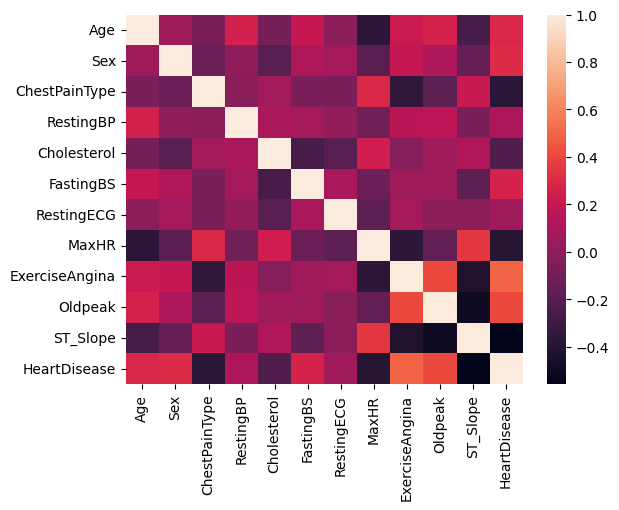

In [66]:
sns.heatmap(data_corr.corr())

In [ ]:
correlation= data_corr.corrwith(data_corr['HeartDisease'])

Age               0.282039
Sex               0.305445
ChestPainType    -0.386828
RestingBP         0.107589
Cholesterol      -0.232741
FastingBS         0.267291
RestingECG        0.057384
MaxHR            -0.400421
ExerciseAngina    0.494282
Oldpeak           0.403951
ST_Slope         -0.558771
HeartDisease      1.000000
dtype: float64

<Axes: >

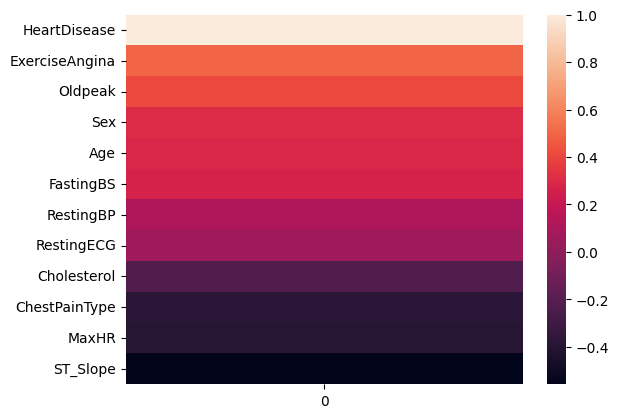

In [73]:
correlation= data_corr.corrwith(data_corr['HeartDisease']).sort_values(ascending=False)
sns.heatmap(pd.DataFrame(correlation))

# References
fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.


Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.

University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
    
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.

V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
